# Tập dữ liệu nhà ở tại Việt Nam thành phố Hà Nội

Đây là một tập dữ liệu về các thông tin nhà ở bao gồm địa chỉ, diện tích, giá nhà,... ở thành phố Hà Nội, Việt Nam. Ta sẽ đi sơ qua về dữ liệu cũng như các bước tiền xử lý, phân tích, hồi quy và cuối cùng là dự đoán giá nhà nhờ vào các biến đã cho.

Link tập dữ liệu: https://www.kaggle.com/datasets/ladcva/vietnam-housing-dataset-hanoi?select=VN_housing_dataset.csv

Tập dữ liệu này có nguồn kiểm chứng từ: https://creativecommons.org/licenses/by-nc-sa/4.0/

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Thu nhập dữ liệu

In [2]:
vn_house_df = pd.read_csv('data/VN_housing_dataset.csv')
vn_house_df

,Unnamed: 0,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,0.0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,1.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2.0,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,3.0,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,4.0,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82492,82492.0,2019-08-07,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,50 m²,NaN,NaN,292 triệu/m²
82493,82493.0,2019-08-07,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Đã có sổ,NaN,4 phòng,41 m²,NaN,NaN,"341,46 triệu/m²"
82494,82494.0,2019-08-05,"Đường Quan Hoa, Phường Quan Hoa, Quận Cầu Giấy...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà ngõ, hẻm",Đã có sổ,NaN,4 phòng,60 m²,NaN,NaN,"101,67 triệu/m²"
82495,82495.0,2019-08-05,"Đường Hồ Tùng Mậu, Phường Mai Dịch, Quận Cầu G...",Quận Cầu Giấy,Phường Mai Dịch,Nhà phố liền kề,NaN,NaN,4 phòng,45 m²,NaN,NaN,"102,22 triệu/m²"


### Có bao nhiêu dòng cột? Có dòng nào bị lặp không ?

In [3]:
vn_house_df.shape

(82497, 13)

In [4]:
have_duplicated_rows = vn_house_df.duplicated().any()
have_duplicated_rows

False

## Khám phá dữ liệu

In [5]:
vn_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82497 entries, 0 to 82496
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       82496 non-null  float64
 1   Ngày             82496 non-null  object 
 2   Địa chỉ          82449 non-null  object 
 3   Quận             82495 non-null  object 
 4   Huyện            82449 non-null  object 
 5   Loại hình nhà ở  82465 non-null  object 
 6   Giấy tờ pháp lý  53610 non-null  object 
 7   Số tầng          36399 non-null  object 
 8   Số phòng ngủ     82458 non-null  object 
 9   Diện tích        82495 non-null  object 
 10  Dài              19827 non-null  object 
 11  Rộng             35445 non-null  object 
 12  Giá/m2           82484 non-null  object 
dtypes: float64(1), object(12)
memory usage: 8.2+ MB


In [6]:
vn_house_df.nunique()

Unnamed: 0         82496
Ngày                 174
Địa chỉ            13957
Quận                  29
Huyện                309
Loại hình nhà ở        4
Giấy tờ pháp lý        3
Số tầng               29
Số phòng ngủ          11
Diện tích            504
Dài                  487
Rộng                 410
Giá/m2              8345
dtype: int64

Như vậy, ta có thể nhận định được các cột categorical và numerical một cách dễ dàng.

In [7]:
categorical_cols = ['Quận','Huyện','Loại hình nhà ở','Giấy tờ pháp lý']
numerical_cols = ['Số tầng','Số phòng ngủ','Diện tích','Giá/m2']

## Tiền xử lý dữ liệu

Nhìn vào dữ liệu, ta cần lưu ý vài thứ như sau:
- Nếu nhìn sâu một chút, cột Quận Huyện đã nằm bên trong cột địa chỉ bởi vì địa chỉ được ghi một cách đầy đủ theo quy định ở nước ta nên ta sẽ không tính hai cột này vào thống kê mô tả tuy vẫn có giá trị trực quan.
- Cột Diện tích thực chất là tích của hai cột Dài và Rộng.

In [8]:
removed_cols = ['Unnamed: 0','Dài','Rộng']
vn_house_df.drop(columns=removed_cols,inplace=True)
vn_house_df

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,65 triệu/m²
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,100 triệu/m²
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,"86,11 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...
82492,2019-08-07,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,50 m²,292 triệu/m²
82493,2019-08-07,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Đã có sổ,NaN,4 phòng,41 m²,"341,46 triệu/m²"
82494,2019-08-05,"Đường Quan Hoa, Phường Quan Hoa, Quận Cầu Giấy...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà ngõ, hẻm",Đã có sổ,NaN,4 phòng,60 m²,"101,67 triệu/m²"
82495,2019-08-05,"Đường Hồ Tùng Mậu, Phường Mai Dịch, Quận Cầu G...",Quận Cầu Giấy,Phường Mai Dịch,Nhà phố liền kề,NaN,NaN,4 phòng,45 m²,"102,22 triệu/m²"


Ta sẽ cập nhật lại numerical_cols

In [9]:
numerical_cols = ['Số tầng','Số phòng ngủ','Diện tích','Giá/m2']

Tiếp theo, ta cần đổi các dạng dữ liệu ở các cột numerical sang số thay vì object. Ví dụ, cột "Số phòng ngủ" dư chữ phòng, ta sẽ muốn giữ lại số thôi. Tương tự với "Diện tích" và "Giá/m2" loại bỏ các đơn vị đo không cần thiết.

Tuy nhiên, ta có các giá trị như đ/m2, tỷ/m2, ta sẽ bỏ qua các giá trị này bởi vì phần lớn dữ liệu tập trung ở triệu/m2.

Ta vẫn có thể chuyển đổi giá trị tuy nhiên có thể khiến dữ liệu xuất hiện các outlier bởi vì tỷ/m2 quá lớn trong khi đ/m2 quá nhỏ.

In [10]:
vn_house_df = vn_house_df[vn_house_df['Giá/m2'].str.contains('triệu/m²') == True]
vn_house_df

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,65 triệu/m²
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,100 triệu/m²
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,"86,11 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...
82491,2019-08-23,"Đường Hồ Tùng Mậu, Phường Phúc Diễn, Quận Bắc ...",Quận Bắc Từ Liêm,Phường Phúc Diễn,Nhà phố liền kề,NaN,NaN,3 phòng,38 m²,"81,58 triệu/m²"
82492,2019-08-07,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,50 m²,292 triệu/m²
82493,2019-08-07,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Đã có sổ,NaN,4 phòng,41 m²,"341,46 triệu/m²"
82494,2019-08-05,"Đường Quan Hoa, Phường Quan Hoa, Quận Cầu Giấy...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà ngõ, hẻm",Đã có sổ,NaN,4 phòng,60 m²,"101,67 triệu/m²"


In [11]:
def remove(x):
    floor = "Nhiều hơn 10"
    room = "phòng"
    other_room = "nhiều hơn 10 phòng"
    meter_squared = "m²"
    milion_meter = " triệu/m²"
    if floor in x:
        x = int(x.replace(floor,'11'))
    elif other_room in x:
        x = 11
    elif room in x:
        x = int(x.replace(room,""))
    elif milion_meter in x:
        x = x.replace(",","")
        x = float((x.replace(milion_meter,"")))
    elif meter_squared in x:
        x = float(x.replace(meter_squared,""))
    return x

In [12]:
for col in numerical_cols:
    data = vn_house_df[col].dropna()
    vn_house_df[col] = data.apply(remove)
vn_house_df['Số tầng'] = pd.to_numeric(vn_house_df['Số tầng'])

C:\Users\HP\AppData\Local\Temp\ipykernel_31708\55565920.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vn_house_df[col] = data.apply(remove)
C:\Users\HP\AppData\Local\Temp\ipykernel_31708\55565920.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vn_house_df['Số tầng'] = pd.to_numeric(vn_house_df['Số tầng'])


In [13]:
vn_house_df

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4.0,5.0,46.0,8696.0
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3.0,37.0,11622.0
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4.0,4.0,40.0,65.0
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6.0,51.0,100.0
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4.0,36.0,8611.0
...,...,...,...,...,...,...,...,...,...,...
82491,2019-08-23,"Đường Hồ Tùng Mậu, Phường Phúc Diễn, Quận Bắc ...",Quận Bắc Từ Liêm,Phường Phúc Diễn,Nhà phố liền kề,NaN,NaN,3.0,38.0,8158.0
82492,2019-08-07,"Đường Trần Quốc Hoàn, Phường Quan Hoa, Quận Cầ...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",NaN,NaN,3.0,50.0,292.0
82493,2019-08-07,"Đường Nguyễn Khánh Toàn, Phường Quan Hoa, Quận...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Đã có sổ,NaN,4.0,41.0,34146.0
82494,2019-08-05,"Đường Quan Hoa, Phường Quan Hoa, Quận Cầu Giấy...",Quận Cầu Giấy,Phường Quan Hoa,"Nhà ngõ, hẻm",Đã có sổ,NaN,4.0,60.0,10167.0


Tiền xử lý hoàn thành

## Thống kê mô tả

Chúng ta sẽ thống kê các đại lượng trong thống kê mô tả như sau:
* Giá trị trung bình: mean
* Độ lệch chuẩn: std
* Giá trị nhỏ nhất: min
* Tứ phân vị thứ nhất: Q1
* Tứ phân vị thứ hai: Q2, hay còn gọi là trung vị: median
* Tứ phân vị thứ ba: Q3
* Giá trị lớn nhất: max

In [14]:
vn_house_df.describe()

,Số tầng,Số phòng ngủ,Diện tích,Giá/m2
count,36051.000000,81588.000000,81626.000000,81626.000000
mean,4.461735,3.880166,47.732516,7391.390746
std,1.555215,1.495723,63.173632,6828.196694
min,1.000000,1.000000,2.000000,1.000000
25%,4.000000,3.000000,34.000000,925.000000
50%,5.000000,4.000000,40.000000,7657.000000
75%,5.000000,4.000000,50.000000,9848.000000
max,73.000000,11.000000,10360.000000,98361.000000


Trực quan hóa cho thuộc tính "Số phòng ngủ" thông qua biểu đồ hộp và rút ra các thông số thống kê

<AxesSubplot:xlabel='Số phòng ngủ'>

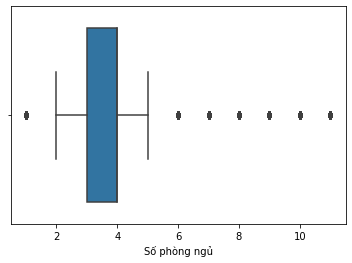

In [15]:
sns.boxplot(x='Số phòng ngủ', data=vn_house_df)

* mean = 3.880166
* std = 1.495723
* min = 1.000000
* Q1 = 3.000000
* Q2 = median = 4.000000
* Q3 = 4.000000
* max = 11.000000

Quan sát biểu đồ hộp tương ứng cho thuộc tính "Số phòng ngủ", rút ra được một số nhận xét sau:
* Giá trị trung bình là 3.88, trung vị là 4.00
* Khoảng dữ liệu là max-min = 10.00
* Khoảng tứ phân vị IQR = Q3-Q1 = 1.00
* Nhận thấy tập dữ liệu bị lệch trái
* Nhìn chung, số phòng ngủ đều tập trung xung quanh giá trị 2, 3 phòng ngủ. Tính toán hệ số dao động cv cho thấy cv < 1, nên dữ liệu dao động trung bình yếu. Có một số giá trị đột biến (như 6, 11 phòng ngủ).

Trực quan hóa cho thuộc tính "Số tầng" thông qua biểu đồ hộp và rút ra các thông số thống kê

<AxesSubplot:xlabel='Số tầng'>

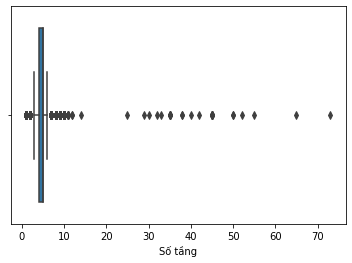

In [16]:
sns.boxplot(x='Số tầng', data=vn_house_df)

* mean = 4.461735
* std = 1.555215	
* min = 1.000000
* Q1 = 4.000000
* Q2 = median = 4.000000
* Q3 = 5.000000
* max = 73.000000

Quan sát biểu đồ hộp tương ứng cho thuộc tính "Số tầng", rút ra được một số nhận xét sau:
* Giá trị trung bình là 4.46, trung vị là 4.00
* Khoảng dữ liệu là max-min = 72.00
* Khoảng tứ phân vị IQR = Q3-Q1 = 1.00
* Nhận thấy tập dữ liệu bị lệch phải
* Tính toán hệ số dao động cv, cho thấy cv < 1, nên dữ liệu dao động trung bình yếu. Dữ liệu ngoại lai khá nhiều và dày đặc

Trực quan hóa cho thuộc tính "Diện tích" thông qua biểu đồ hộp và rút ra các thông số thống kê

<AxesSubplot:xlabel='Diện tích'>

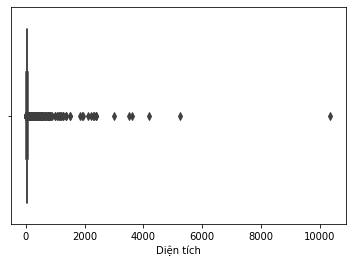

In [17]:
sns.boxplot(x='Diện tích', data=vn_house_df)

* mean = 47.732516
* std = 63.173632	
* min = 2.000000
* Q1 = 34.000000
* Q2 = median = 40.000000
* Q3 = 50.000000
* max = 10360.000000

Quan sát biểu đồ hộp tương ứng cho thuộc tính "Diện tích", rút ra được một số nhận xét sau:
* Giá trị trung bình là 47.73, trung vị là 40.00
* Khoảng dữ liệu là max-min = 10358.00
* Khoảng tứ phân vị IQR = Q3-Q1 = 16.00
* Nhận thấy tập dữ liệu bị lệch phải
* Tính toán hệ số dao động cv, cho thấy cv > 1, nên dữ liệu dao động rất mạnh. Dữ liệu ngoại lai khá nhiều và dày đặc, có một điểm đột biến bất thường ở giá trị 10360

Trực quan hóa cho thuộc tính "Giá/m2" thông qua biểu đồ hộp và rút ra các thông số thống kê

<AxesSubplot:xlabel='Giá/m2'>

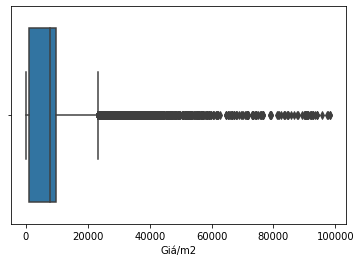

In [18]:
sns.boxplot(x='Giá/m2', data=vn_house_df)

* mean = 7391.390746
* std = 6828.196694
* min = 1.000000
* Q1 = 925.000000
* Q2 = median = 7657.000000
* Q3 = 9848.000000
* max = 98361.000000

Quan sát biểu đồ hộp tương ứng cho thuộc tính "Giá/m2", rút ra được một số nhận xét sau:
* Giá trị trung bình là 7391.390746, trung vị là 7657.000000
* Khoảng dữ liệu là max-min = 98360.00
* Khoảng tứ phân vị IQR = Q3-Q1 = 8923.00
* Nhận thấy tập dữ liệu bị lệch trái
* Tính toán hệ số dao động cv, cho thấy cv < 1, nên dữ liệu dao động trung bình yếu. Dữ liệu ngoại lai khá nhiều và dày đặc.

## Phân tích dữ liệu

### Với mỗi cột numerical, dữ liệu được phân bố như thế nào?

In [19]:
def missing_ratio(col):
    return col.isna().mean() * 100
nume_col_profiles_df = vn_house_df[numerical_cols].agg([missing_ratio,pd.Series.min,pd.Series.max])
nume_col_profiles_df

,Số tầng,Số phòng ngủ,Diện tích,Giá/m2
missing_ratio,55.833925,0.046554,0.0,0.0
min,1.000000,1.000000,2.0,1.0
max,73.000000,11.000000,10360.0,98361.0


Như ta thấy, số lượng min max của mỗi cột đều khá hợp lý, nên ta sẽ xét lượng missing_ratio

Cột diện tích và Giá/m2 không bị thiếu dữ liệu. Số phòng ngủ thì chỉ thiếu khoảng 0.05%, không đáng kể. Điều bất thường ở đây là số tầng thì lại thiếu tới 55,8% tới hơn 1 nửa tổng dữ liệu. Khá là kỳ lạ

Ở đây ta sẽ thực hiện 2 việc:
- Bỏ những dòng giá trị nan ở cột số phòng ngủ
- Thay giá trị nan ở cột số tầng thành 0.

In [20]:
vn_house_df.dropna(subset=['Số phòng ngủ'], how='all', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_31708\2027813643.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vn_house_df.dropna(subset=['Số phòng ngủ'], how='all', inplace=True)


In [21]:
vn_house_df['Số tầng'] = vn_house_df['Số tầng'].fillna(0)

C:\Users\HP\AppData\Local\Temp\ipykernel_31708\973119589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vn_house_df['Số tầng'] = vn_house_df['Số tầng'].fillna(0)


Giờ ta hãy kiểm tra lại missing ratio

In [22]:
nume_col_profiles_df = vn_house_df[numerical_cols].agg([missing_ratio,pd.Series.min,pd.Series.max])
nume_col_profiles_df

,Số tầng,Số phòng ngủ,Diện tích,Giá/m2
missing_ratio,0.0,0.0,0.0,0.0
min,0.0,1.0,2.0,1.0
max,73.0,11.0,10360.0,98361.0


### Với mỗi cột categorical, dữ liệu được phân bố như thế nào?

In [23]:
def num_diff_vals(col):
    return len(col.value_counts())
def diff_vals(col):
    return col.value_counts().index.unique().to_numpy()

cate_col_profiles_df = vn_house_df[categorical_cols].agg([missing_ratio,num_diff_vals,diff_vals])
cate_col_profiles_df

,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý
missing_ratio,0.001226,0.049027,0.023288,35.081139
num_diff_vals,29,308,4,3
diff_vals,"[Quận Đống Đa, Quận Thanh Xuân, Quận Hoàng Mai...","[Phường Khương Trung, Phường Khương Đình, Phườ...","[Nhà ngõ, hẻm, Nhà mặt phố, mặt tiền, Nhà phố ...","[Đã có sổ, Đang chờ sổ, Giấy tờ khác]"


Loại hình nhà ở có 4 giá trị khác nhau là Nhà ngõ, hẻm, Nhà mặt phố, mặt tiền, Nhà phố liền kề.

Giấy tờ pháp lý có 3 giá trị khác nhau là Đã có sổ, Đang chờ sổ, Giấy tờ khác

Xét về missing ratio thì loại hình nhà ở chỉ thiếu khoảng 0.03%, không đáng kể, trong khi giấy tờ pháp lý thì lại thiếu tới 35%. Chứng tỏ khoảng 1/3 hộ gia đình thiếu hoặc không khai báo giấy tờ nhà của hộ.

Ở đây ta sẽ thực hiện 2 việc:
- Bỏ những dòng giá trị nan ở cột loại hình nhà ở
- Thay giá trị nan ở cột giấy tờ pháp lý thành **Chưa có giấy tờ**

In [24]:
vn_house_df.dropna(subset=['Quận'], how='all', inplace=True)
vn_house_df.dropna(subset=['Huyện'], how='all', inplace=True)
vn_house_df.dropna(subset=['Loại hình nhà ở'], how='all', inplace=True)
vn_house_df['Giấy tờ pháp lý'] = vn_house_df['Giấy tờ pháp lý'].fillna('Chưa có giấy tờ')

C:\Users\HP\AppData\Local\Temp\ipykernel_31708\474748682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vn_house_df.dropna(subset=['Quận'], how='all', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_31708\474748682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vn_house_df.dropna(subset=['Huyện'], how='all', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_31708\474748682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

In [25]:
cate_col_profiles_df = vn_house_df[categorical_cols].agg([missing_ratio,num_diff_vals,diff_vals])
cate_col_profiles_df

,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý
missing_ratio,0.0,0.0,0.0,0.0
num_diff_vals,29,308,4,4
diff_vals,"[Quận Đống Đa, Quận Thanh Xuân, Quận Hoàng Mai...","[Phường Khương Trung, Phường Khương Đình, Phườ...","[Nhà ngõ, hẻm, Nhà mặt phố, mặt tiền, Nhà phố ...","[Đã có sổ, Chưa có giấy tờ, Đang chờ sổ, Giấy ..."


## Phân tích hồi quy, dự báo

Thay đổi tên các cột thành tiếng Anh

In [26]:
vn_house_df2 = pd.DataFrame()

Chọn ra những trường dữ liệu cần thiết cho việc hồi qui

In [27]:
vn_house_df2['Price'] = vn_house_df['Giá/m2']
vn_house_df2['Type'] = vn_house_df['Loại hình nhà ở'] 
vn_house_df2['Bedrooms'] = vn_house_df['Số phòng ngủ']
vn_house_df2['Area'] = vn_house_df['Diện tích']
vn_house_df2['Floors'] = vn_house_df['Số tầng']
vn_house_df2.head()

,Price,Type,Bedrooms,Area,Floors
0,8696.0,"Nhà ngõ, hẻm",5.0,46.0,4.0
1,11622.0,"Nhà mặt phố, mặt tiền",3.0,37.0,0.0
2,65.0,"Nhà ngõ, hẻm",4.0,40.0,4.0
3,100.0,"Nhà ngõ, hẻm",6.0,51.0,0.0
4,8611.0,"Nhà ngõ, hẻm",4.0,36.0,0.0


### Mô hình hồi qui với Price ~ Bedrooms + Area

In [28]:
res = smf.ols(formula='Price ~ Bedrooms + Area + Floors', data=vn_house_df2).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     826.3
Date:                Sat, 27 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:18:40   Log-Likelihood:            -8.3430e+05
No. Observations:               81532   AIC:                         1.669e+06
Df Residuals:                   81528   BIC:                         1.669e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4268.0893     67.194     63.519      0.0

### Nhận xét các giá trị quan trọng của Summary

* `R-squared` và `Adj. R-squared` có giá trị 0.028 cho thấy các biến độc lập chưa giải thích được nhiều mô hình tức vẫn còn nhiều điểm không nằm trong đường hồi quy chính là các outlier dẫn đến tình trạng mô hình chưa được tốt.
* `Coefficient`: các giá trị hệ số tương quan đều **dương**
    * `Intercept`: 4379.8017 -> Hệ số tự do **b** (trong công thức **y = ax + b**) ảnh hưởng lớn đến Price
    * `Bedrooms`: 758.9257 -> Số lượng phòng ngủ ảnh hưởng khá lớn đến Price
    * `Area`: 1.4156 -> Diện tích có ảnh hưởng ít đến Price
* `Sai số chuẩn(std error)` ở số lượng phòng ngủ cũng như số tầng cao trong khi diện tích(area) thấp chứng tỏ mức độ phụ thuộc nhất định của diện tích.
* `P>|t|` càng lớn chứng tỏ các trường dữ liệu càng ít liên quan đến mô hình dữ liệu. Tuy nhiên ở đây, cả ba trường dữ liệu đều bằng 0.

Như vậy ta có thể thấy tỉ lệ chính xác của các điểm dữ liệu nằm trên đường hồi quy còn chưa cao vì bị ảnh hưởng ít nhiều từ các outlier. Ta có thể biến đổi cũng như áp dụng các phương pháp remove outlier để cải thiện mô hình.

### Trực quan mô hình hồi qui

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


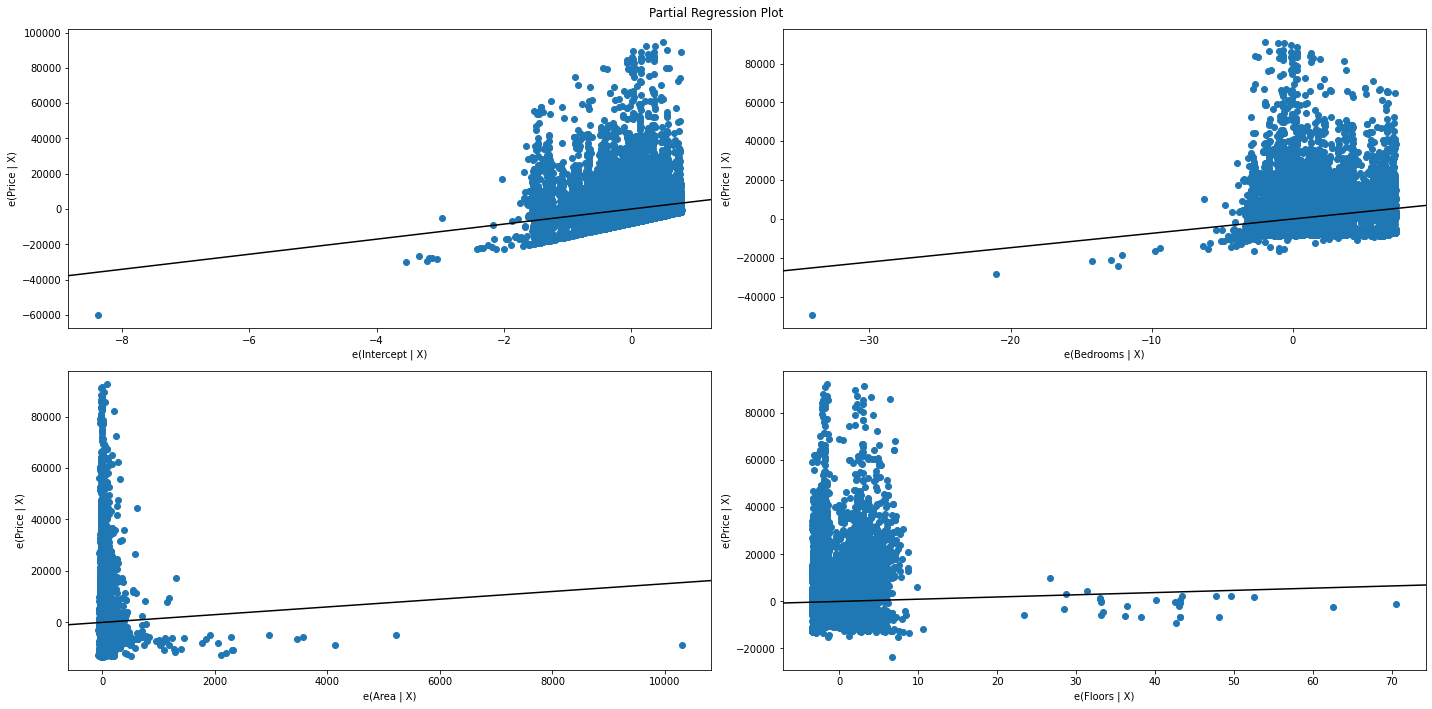

In [29]:
fig = plt.figure(figsize=(20, 10))
sm.graphics.plot_partregress_grid(res, fig=fig)
plt.show()

## Dự đoán giá nhà

Để dự đoán giá nhà chính xác, mô hình hồi quy là chưa đủ, ta có thể áp dụng một thuật toán khác là ANN(Mạng thần kinh nhân tạo) từ các thư viện của Tensorflow.

In [30]:
vn_house_df = pd.read_csv('data/VN_housing_dataset.csv')
renamed_vn_house_df = vn_house_df.rename(columns = {"Ngày":"date", "Địa chỉ":"address", "Quận":"district", 
                                  "Huyện":"ward", "Loại hình nhà ở":"type_of_housing",
                                 "Giấy tờ pháp lý":"legal_paper", "Số tầng":"num_floors",
                                 "Số phòng ngủ":"num_bed_rooms", "Diện tích":"squared_meter_area",
                                 "Dài":"length_meter", "Rộng":"width_meter", "Giá/m2":"price_in_million_per_square_meter"})
renamed_vn_house_df = renamed_vn_house_df.drop("Unnamed: 0", axis = 1)
renamed_vn_house_df = renamed_vn_house_df.dropna()
renamed_vn_house_df = renamed_vn_house_df.reset_index()

renamed_vn_house_df = renamed_vn_house_df[renamed_vn_house_df['num_floors'] != 'Nhiều hơn 10']
renamed_vn_house_df = renamed_vn_house_df[renamed_vn_house_df['num_bed_rooms'] != 'nhiều hơn 10 phòng']

# Clean columns and convert numerical columns to float type
renamed_vn_house_df['district'] = renamed_vn_house_df['district'].str.replace('Quận ','').str.strip()
renamed_vn_house_df['ward'] = renamed_vn_house_df['ward'].str.replace('Phường ','').str.strip()
renamed_vn_house_df['num_floors'] = renamed_vn_house_df['num_floors'].str.strip().astype(float)
renamed_vn_house_df['num_bed_rooms'] = renamed_vn_house_df['num_bed_rooms'].str.replace(' phòng','').str.strip().astype(float)
renamed_vn_house_df['squared_meter_area'] = renamed_vn_house_df['squared_meter_area'].str.replace(' m²','').str.strip().astype(float)
renamed_vn_house_df['length_meter'] = renamed_vn_house_df['length_meter'].str.replace(' m','').str.strip().astype(float)
renamed_vn_house_df['width_meter'] = renamed_vn_house_df['width_meter'].str.replace(' m','').str.strip().astype(float)

renamed_vn_house_df.loc[renamed_vn_house_df['price_in_million_per_square_meter'].str.contains(' tỷ/m²'), 'price_in_million_per_square_meter'] = renamed_vn_house_df.loc[renamed_vn_house_df['price_in_million_per_square_meter'].str.contains(' tỷ/m²'), 'price_in_million_per_square_meter'].str.replace(' tỷ/m²','').str.replace('.','').str.replace(',','.').astype(float) * 1000
renamed_vn_house_df.loc[renamed_vn_house_df['price_in_million_per_square_meter'].str.contains(' triệu/m²', na=False), 'price_in_million_per_square_meter'] = renamed_vn_house_df.loc[renamed_vn_house_df['price_in_million_per_square_meter'].str.contains(' triệu/m²', na=False), 'price_in_million_per_square_meter'].str.replace(' triệu/m²','').str.replace(',','.').astype(float)
renamed_vn_house_df.loc[renamed_vn_house_df['price_in_million_per_square_meter'].str.contains(' đ/m²', na=False), 'price_in_million_per_square_meter'] = renamed_vn_house_df.loc[renamed_vn_house_df['price_in_million_per_square_meter'].str.contains(' đ/m²', na=False), 'price_in_million_per_square_meter'].str.replace(' đ/m²','').str.replace('.','').astype(float) * 0.000001

# Create dummies for categorical columns
dummy_type_of_housing = pd.get_dummies(renamed_vn_house_df.type_of_housing, prefix="housing_type")
dummy_legal_paper = pd.get_dummies(renamed_vn_house_df.legal_paper, prefix="legal_paper")
dummy_district = pd.get_dummies(renamed_vn_house_df.district, prefix="district")
dummy_ward = pd.get_dummies(renamed_vn_house_df.ward, prefix="ward")

clean_vn_house_df = pd.concat([renamed_vn_house_df, dummy_type_of_housing, dummy_legal_paper, dummy_district, dummy_ward], axis=1)
clean_vn_house_df = clean_vn_house_df.drop(['index', 'date', 'address', 'district', 'ward', 'type_of_housing', 'legal_paper'], axis = 1)

C:\Users\HP\AppData\Local\Temp\ipykernel_31708\3091067243.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  renamed_vn_house_df.loc[renamed_vn_house_df['price_in_million_per_square_meter'].str.contains(' tỷ/m²'), 'price_in_million_per_square_meter'] = renamed_vn_house_df.loc[renamed_vn_house_df['price_in_million_per_square_meter'].str.contains(' tỷ/m²'), 'price_in_million_per_square_meter'].str.replace(' tỷ/m²','').str.replace('.','').str.replace(',','.').astype(float) * 1000
C:\Users\HP\AppData\Local\Temp\ipykernel_31708\3091067243.py:25: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  renamed_vn_house_df.loc[renamed_vn_house_df['price_in_million_per_square_meter'].str.cont

Nhóm sử dụng phương pháp IQR để xóa bỏ các outlier không cần thiết.

In [31]:
def remove_outlier_IQR(df, series):
    Q1=df[series].quantile(0.25)
    Q3=df[series].quantile(0.75)
    IQR=Q3-Q1
    df_final=df[~((df[series]<(Q1-1.5*IQR)) | (df[series]>(Q3+1.5*IQR)))]
    return df_final

removed_outliers = clean_vn_house_df
columns_to_remove_outliers = ['num_floors', 'num_bed_rooms', 'squared_meter_area', 'length_meter',
                              'width_meter', 'price_in_million_per_square_meter']
for column in columns_to_remove_outliers:
    removed_outliers = remove_outlier_IQR(removed_outliers, column)

Từ hơn 80k dòng, ta đã rút gọn xuống chỉ còn 7328 dòng.

In [32]:
removed_outliers

,num_floors,num_bed_rooms,squared_meter_area,length_meter,width_meter,price_in_million_per_square_meter,housing_type_Nhà biệt thự,"housing_type_Nhà mặt phố, mặt tiền","housing_type_Nhà ngõ, hẻm",housing_type_Nhà phố liền kề,...,ward_Đại Mỗ,ward_Định Công,ward_Đống Mác,ward_Đồng Mai,ward_Đồng Nhân,ward_Đồng Tâm,ward_Đồng Xuân,ward_Đội Cấn,ward_Đức Giang,ward_Đức Thắng
0,4.0,4.0,40.0,10.0,4.0,65.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,4.0,52.0,12.0,4.2,93.27,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,3.0,32.0,6.6,4.5,60.94,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,2.0,42.0,11.0,4.0,29.76,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,4.0,4.0,43.0,11.0,4.0,50.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11460,4.0,4.0,50.0,13.0,3.0,150.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11461,3.0,4.0,50.0,12.5,4.0,118.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11463,4.0,3.0,42.0,12.0,3.0,83.33,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
11464,4.0,4.0,73.0,14.0,5.0,72.6,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
housing = removed_outliers

# Separate predictors and response (price) variables
X = housing.loc[:, housing.columns != 'price_in_million_per_square_meter']
y = housing[['price_in_million_per_square_meter']]
to_be_scaled = ['num_floors', 'num_bed_rooms', 'squared_meter_area', 'length_meter', 'width_meter']

# Initiate scaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

X_scaled = X
y_scaled = y

# Storing the fit object for reference and reverse the scaling later
PredictorScalerFit=PredictorScaler.fit(X_scaled[to_be_scaled])
TargetVarScalerFit=TargetVarScaler.fit(y_scaled)
 
# Generating the standardized values of X and y
X_scaled[to_be_scaled]=PredictorScalerFit.transform(X_scaled[to_be_scaled])
y_scaled=TargetVarScalerFit.transform(y)

X_array = np.array(X_scaled.values).astype("float32")
y_array = np.array(y_scaled).astype("float32")
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.2, random_state=2032)

C:\Users\HP\AppData\Local\Temp\ipykernel_31708\513695635.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_scaled[to_be_scaled]=PredictorScalerFit.transform(X_scaled[to_be_scaled])


In [34]:
# Fitting the ANN to the Training set
ANN = Sequential()                
ANN.add(Dense(units=10, input_dim=X_train.shape[1], 
                kernel_initializer='normal', activation='relu'))
ANN.add(Dense(1, kernel_initializer='normal'))
ANN.compile(loss='mean_squared_error', optimizer={'batch_size': 30, 'epochs': 20, 'optimizer_trial': 'rmsprop'}['optimizer_trial'])
ANN.fit(X_train, y_train,batch_size = int({'batch_size': 30, 'epochs': 20, 'optimizer_trial': 'rmsprop'}['batch_size']),
        epochs = int({'batch_size': 30, 'epochs': 20, 'optimizer_trial': 'rmsprop'}['epochs']), verbose=0)

# Generating Predictions on testing data
ANN_predictions = ANN.predict(X_test)
 
# Scaling the predicted Price data back to original price scale
ANN_predictions = TargetVarScalerFit.inverse_transform(ANN_predictions)

# Scaling the y_test Price data back to original price scale
y_test_orig = TargetVarScalerFit.inverse_transform(y_test)
 
# Scaling the test data back to original scale
Test_Data = np.concatenate((PredictorScalerFit.inverse_transform(X_test[:,:5]), X_test[:,5:]), axis=1)

# Recreating the dataset, now with predicted price using the ANN model
TestingData = pd.DataFrame(data=Test_Data, columns=X.columns)
TestingData['Price'] = y_test_orig
TestingData['ANN_predictions'] = ANN_predictions

In [35]:
def Accuracy_Score(orig, pred):
    MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
    return(100-MAPE)

print("Accuracy for the ANN model is:", str(Accuracy_Score(TestingData['Price'], TestingData['ANN_predictions'])))

Accuracy for the ANN model is: 83.17572975158691


Khá bất ngờ là ta thu được độ chính xác từ mô hình khá cao (82.72%).

# Kết thúc